In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [40]:
data = pd.read_csv("Automobile_insurance_fraud.csv")
data.head(50)

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                  328   48         521585       17-10-2014           OH   
1                  228   42         342868       27-06-2006           IN   
2                  134   29         687698       06-09-2000           OH   
3                  256   41         227811       25-05-1990           IL   
4                  228   44         367455       06-06-2014           IL   
5                  256   39         104594       12-10-2006           OH   
6                  137   34         413978       04-06-2000           IN   
7                  165   37         429027       03-02-1990           IL   
8                   27   33         485665       05-02-1997           IL   
9                  212   42         636550       25-07-2011           IL   
10                 235   42         543610       26-05-2002           OH   
11                 447   61         214618       29-05-1999           OH   
12                  60   23         842643       20-11-1997           OH   
13                 121   34         626808       26-10-2012           OH   
14                 180   38         644081       28-12-1998           OH   
15                 473   58         892874       19-10-1992           IN   
16                  70   26         558938       08-06-2005           OH   
17                 140   31         275265       15-11-2004           IN   
18                 160   37         921202       28-12-2014           OH   
19                 196   39         143972       02-08-1992           IN   
20                 460   62         183430       25-06-2002           IN   
21                 217   41         431876       27-11-2005           IL   
22                 370   55         285496       27-05-1994           IL   
23                 413   55         115399       08-02-1991           IN   
24                 237   40         736882       02-02-1996           IN   
25                   8   35         699044       05-12-2013           OH   
26                 257   43         863236       20-09-1990           IN   
27                 202   34         608513       18-07-2002           IN   
28                 224   40         914088       08-02-1990           OH   
29                 241   45         596785       04-03-2014           IL   
30                  64   25         908616       18-02-2000           IL   
31                 166   37         666333       19-06-2008           IL   
32                 155   35         336614       01-08-2003           IL   
33                 114   30         584859       04-04-1992           IL   
34                 149   37         990493       13-01-1991           IL   
35                 147   33         129872       08-08-2010           OH   
36                  62   28         200152       09-03-2003           IL   
37                 289   49         933293       03-02-1993           IL   
38                 431   54         485664       25-11-2002           IN   
39                 199   37         982871       27-07-1997           IN   
40                  79   26         206213       08-05-1995           IL   
41                 116   34         616337       30-08-2012           IN   
42                  37   23         448961       30-04-2006           IL   
43                 106   30         790442       13-04-2003           OH   
44                 269   44         108844       05-12-2007           IL   
45                 265   40         430029       21-08-2006           IL   
46                 163   33         529112       08-01-1990           IN   
47                 355   47         939631       18-03-1990           OH   
48                 175   34         866931       07-01-2008           IN   
49                 192   35         582011       10-03-1997           IL   

   policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0     250/500               1000                1406

### Data Preprocessing 

### 1. Data Cleaning

### 2. EDA (Analysis)

### 3. Finding and Treating Outliers (if any)

### 4. Feature Selection for model building

### 5. Model Building

### 6. Hyperparameter tuning



In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [35]:
data.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted            91
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [41]:
data = data.drop(['_c39'], axis=1)

In [42]:
data.dropna(inplace=True)

In [43]:
data.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

In [44]:
categorical_columns = ['policy_state', 'policy_csl', 'insured_sex', 'insured_education_level', 
                       'insured_occupation', 'insured_hobbies', 'insured_relationship', 
                       'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 
                       'incident_state', 'incident_city', 'property_damage', 'police_report_available', 
                       'auto_make', 'auto_model']

data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

In [45]:
# Convert 'policy_bind_date' and 'incident_date' to datetime
data['policy_bind_date'] = pd.to_datetime(data['policy_bind_date'], format='%d-%m-%Y')
data['incident_date'] = pd.to_datetime(data['incident_date'], format='%d-%m-%Y')

# Extract year, month, and day from the date columns
data['policy_bind_year'] = data['policy_bind_date'].dt.year
data['policy_bind_month'] = data['policy_bind_date'].dt.month
data['policy_bind_day'] = data['policy_bind_date'].dt.day

data['incident_year'] = data['incident_date'].dt.year
data['incident_month'] = data['incident_date'].dt.month
data['incident_day'] = data['incident_date'].dt.day

# Drop the original date columns as they are no longer needed
data.drop(columns=['policy_bind_date', 'incident_date'], inplace=True)


In [46]:
from sklearn.preprocessing import LabelEncoder

In [47]:
label_encoder = LabelEncoder()

In [48]:
data['fraud_reported'] = label_encoder.fit_transform(data['fraud_reported'])

In [49]:
data.head(50)

months_as_customer  age  policy_number  policy_deductable  \
0                  328   48         521585               1000   
1                  228   42         342868               2000   
2                  134   29         687698               2000   
3                  256   41         227811               2000   
5                  256   39         104594               1000   
6                  137   34         413978               1000   
7                  165   37         429027               1000   
8                   27   33         485665                500   
9                  212   42         636550                500   
10                 235   42         543610                500   
11                 447   61         214618               2000   
12                  60   23         842643                500   
14                 180   38         644081               2000   
15                 473   58         892874               2000   
16                  70   26         558938               1000   
17                 140   31         275265                500   
18                 160   37         921202                500   
19                 196   39         143972               2000   
20                 460   62         183430               1000   
21                 217   41         431876               2000   
22                 370   55         285496               2000   
23                 413   55         115399               2000   
24                 237   40         736882               1000   
25                   8   35         699044               2000   
26                 257   43         863236               2000   
28                 224   40         914088               2000   
29                 241   45         596785               2000   
30                  64   25         908616               1000   
31                 166   37         666333               2000   
32                 155   35         336614               1000   
33                 114   30         584859               1000   
34                 149   37         990493                500   
35                 147   33         129872               1000   
36                  62   28         200152               1000   
38                 431   54         485664               2000   
39                 199   37         982871                500   
40                  79   26         206213                500   
41                 116   34         616337                500   
42                  37   23         448961                500   
43                 106   30         790442                500   
44                 269   44         108844               2000   
45                 265   40         430029               1000   
46                 163   33         529112                500   
47                 355   47         939631               2000   
48                 175   34         866931               1000   
49                 192   35         582011               1000   
50                 430   59         691189               2000   
53                 223   40         729634                500   
54                 195   39         282195               1000   
55                  22   26         420810               1000   

    policy_annual_premium  umbrella_limit  insured_zip  capital-gains  \
0                 1406.91               0       466132          53300   
1                 1197.22         5000000       468176              0   
2                 1413.14         5000000       430632          35100   
3                 1415.74         6000000       608117          48900   
5                 1351.10               0       478456              0   
6                 1333.35               0       441716              0   
7                 1137.03               0       603195              0   
8                 1442.99               0       601734              0   
9                 1315.68      

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 909 entries, 0 to 999
Columns: 153 entries, months_as_customer to incident_day
dtypes: bool(127), float64(1), int32(7), int64(17), object(1)
memory usage: 279.6+ KB


In [51]:
# Convert all boolean columns to integers
data = data.astype({col: 'int32' for col in data.select_dtypes('bool').columns})


data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 909 entries, 0 to 999
Columns: 153 entries, months_as_customer to incident_day
dtypes: float64(1), int32(134), int64(17), object(1)
memory usage: 617.8+ KB


In [52]:
data.dtypes

months_as_customer         int64
age                        int64
policy_number              int64
policy_deductable          int64
policy_annual_premium    float64
                          ...   
policy_bind_month          int32
policy_bind_day            int32
incident_year              int32
incident_month             int32
incident_day               int32
Length: 153, dtype: object

In [53]:
data = data.drop(['incident_location'], axis=1)

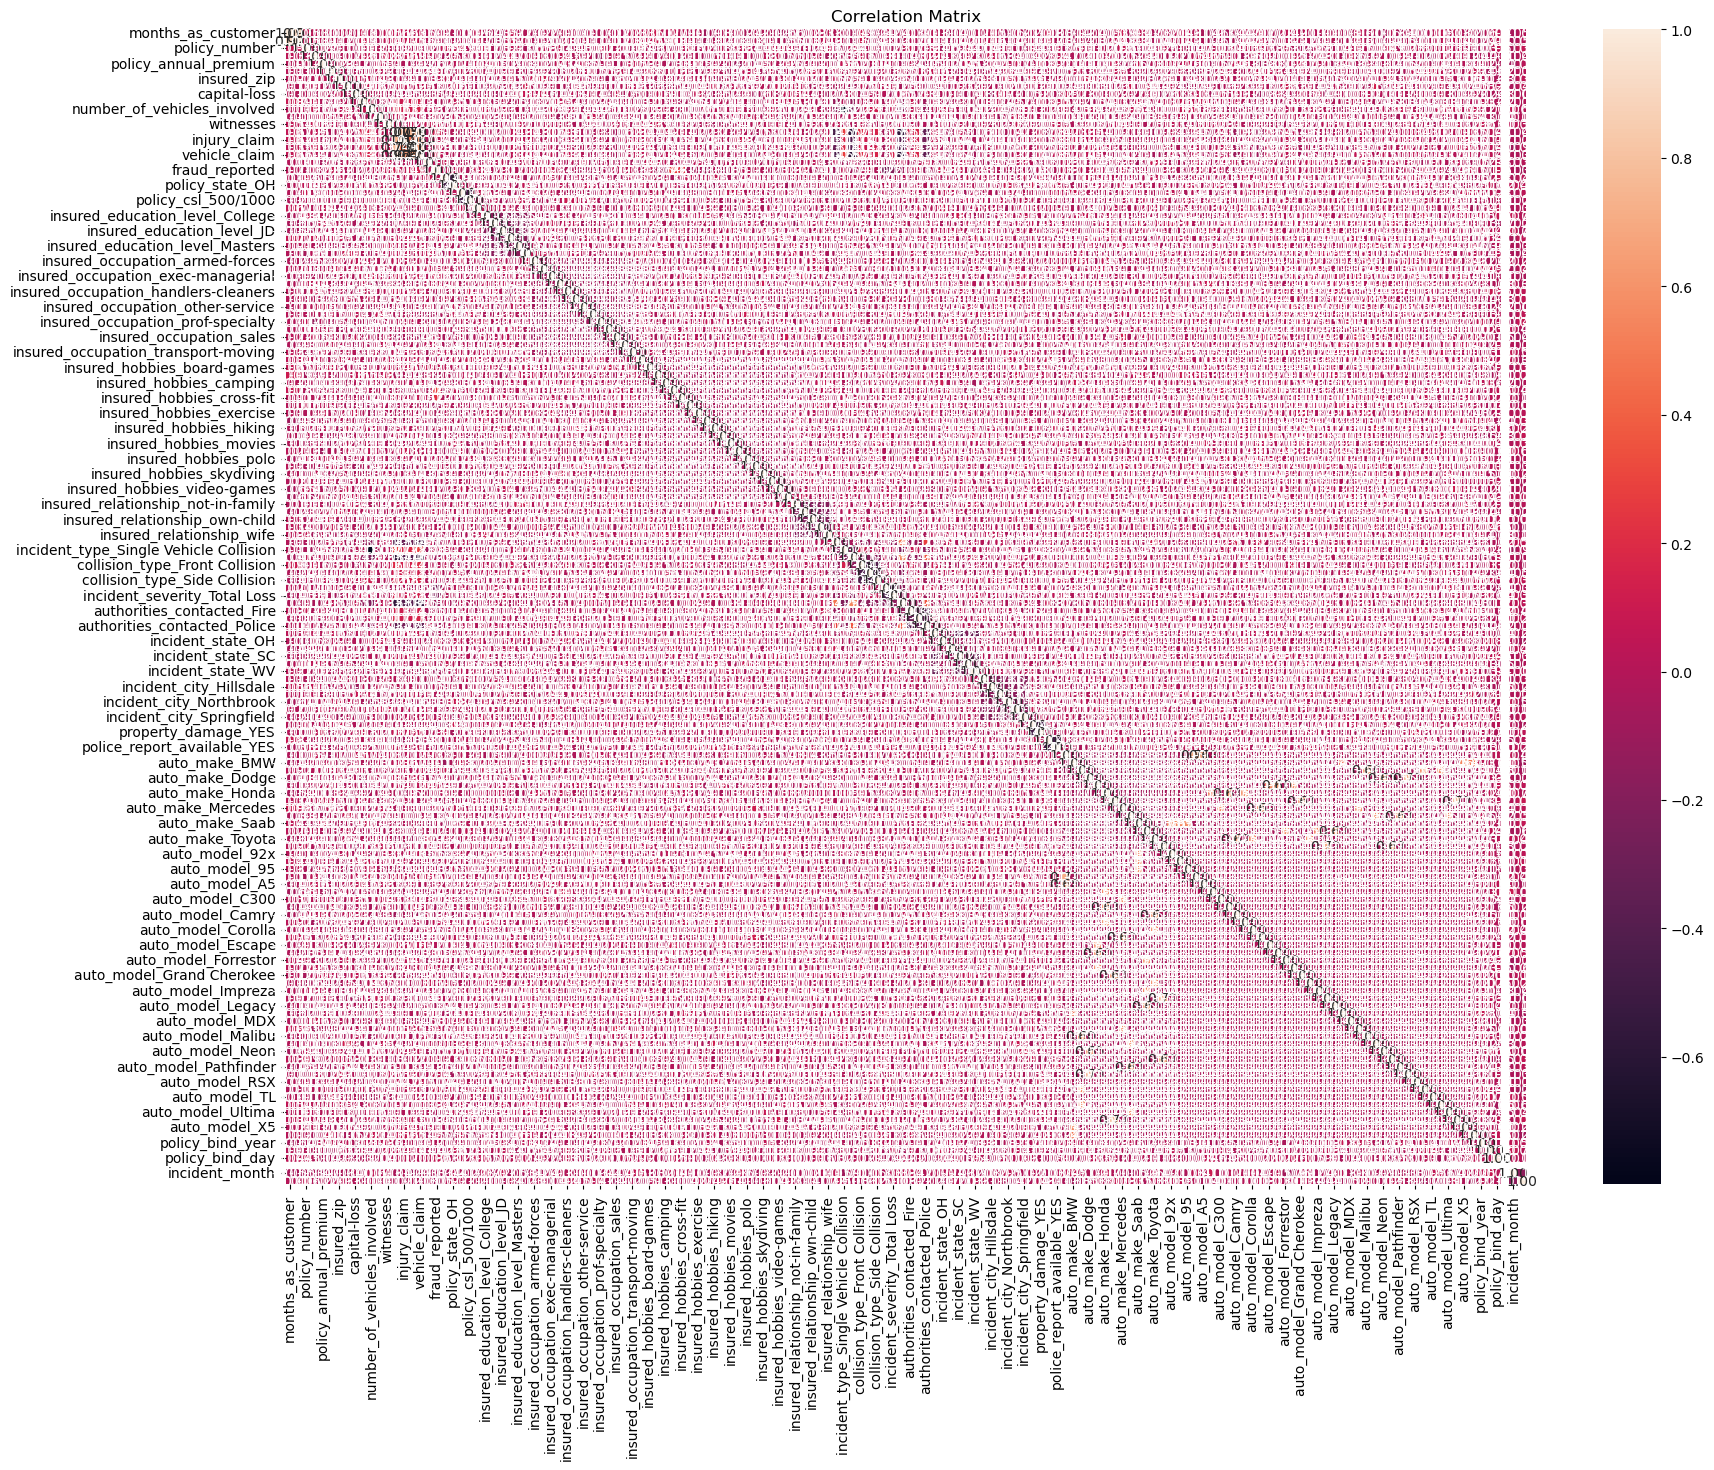

In [54]:
# Correlation matrix
plt.figure(figsize=(20,15))
sns.heatmap(data.corr(), annot=True, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [55]:
X = data.drop(columns=['fraud_reported', ])
y = data['fraud_reported']

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [60]:
# Initialize classification models
lr_clf = LogisticRegression(max_iter=1000, random_state=42)
dt_clf = DecisionTreeClassifier(random_state=42)
rf_clf = RandomForestClassifier(random_state=42)

In [61]:
# List of classification models
classification_models = {'Logistic Regression': lr_clf, 'Decision Tree Classifier': dt_clf, 'Random Forest Classifier': rf_clf}

# Train and evaluate classification models
for name, model in classification_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{name}:\nAccuracy: {accuracy:.2f}')
    print(f'Classification Report:\n{classification_report(y_test, y_pred)}\n')

Logistic Regression:
Accuracy: 0.70
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.99      0.82       128
           1       0.00      0.00      0.00        54

    accuracy                           0.70       182
   macro avg       0.35      0.50      0.41       182
weighted avg       0.49      0.70      0.58       182


Decision Tree Classifier:
Accuracy: 0.78
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       128
           1       0.66      0.54      0.59        54

    accuracy                           0.78       182
   macro avg       0.74      0.71      0.72       182
weighted avg       0.77      0.78      0.77       182


Random Forest Classifier:
Accuracy: 0.71
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.99      0.83       128
           1       0.75      0.06      0.10     

In [64]:
#Hyperparameter tuning on RandomForest Classifier
param_grid = {
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(dt_clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters and model performance
print(f'Best parameters: {grid_search.best_params_}')
best_model = grid_search.best_estimator_

# Evaluate tuned model
y_pred_best = best_model.predict(X_test)
acc_best = accuracy_score(y_test, y_pred_best)

print(f'Best model Accuracy: {acc_best}')

Best parameters: {'max_depth': 10, 'min_samples_split': 10}
Best model Accuracy: 0.8131868131868132


# Automobile Insurance Fraud Detection Project

## Overview
The objective of this project is to build a predictive model that identifies potential insurance fraud cases based on various features in the dataset. The dataset includes various attributes related to insurance policies and incidents, with the target variable indicating whether a fraud report was made.

## Steps Involved:

### 1. Data Preprocessing
- **Loading the Data**: The dataset was loaded from a CSV file.
- **Data Exploration**: 
  - Displayed the first few rows and basic information about the dataset.
  - Checked for missing values and data types.

### 2. Data Cleaning
- **Dropping Unnecessary Columns**: 
  - Removed the `_c39` column and the `incident_location` column.
  - Dropped rows with missing values to ensure a clean dataset.
- **Handling Date Columns**: 
  - Converted `policy_bind_date` and `incident_date` to datetime format.
  - Extracted year, month, and day from these dates and created new features.

### 3. Encoding Categorical Variables
- **One-Hot Encoding**: Applied one-hot encoding to categorical columns to convert them into a numerical format suitable for model training.
- **Label Encoding**: Used label encoding on the target variable `fraud_reported` to convert it into a binary format.

### 4. Data Type Conversion
- Converted all boolean columns to integers for consistency in data types.

### 5. Exploratory Data Analysis (EDA)
- **Correlation Analysis**: Generated a heatmap to visualize the correlation between features and the target variable `fraud_reported`.

### 6. Feature Selection
- **Splitting Data**: The dataset was split into features (`X`) and target (`y`), and further divided into training and testing sets (80/20 split).

### 7. Model Building
- **Classification Models**: Initialized various classification models including:
  - Logistic Regression
  - Decision Tree Classifier
  - Random Forest Classifier
- **Model Training and Evaluation**: Trained the models on the training set and evaluated their performance on the test set using accuracy and classification reports.

### 8. Hyperparameter Tuning
- **Grid Search for Best Parameters**: Performed hyperparameter tuning on the Decision Tree Classifier using `GridSearchCV` to find the optimal parameters for model performance.

## Results
- Presented the accuracy scores and classification reports for each model.
- Displayed the best parameters for the tuned Decision Tree Classifier and its corresponding accuracy on the test set.
